<a href="https://colab.research.google.com/github/ngtinc21/Machine-Learning-Algorithms/blob/main/RNN_Example_2_NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Twitter Sentiment Analysis - Positive/Negative Sentiment**

The example is to analyze the nature of Tweets using NLP. The word limit of a single tweet has 140 characters. Since the analysis is a supervised learning task, the training dataset which consists of Tweets labeled with “1” or “0” and a test dataset without labels.

The training data consists of Tweets labeled with "1" or "0".

Label “0”: Positive Sentiment
Label “1”: Negative Sentiment

  * `train_tweets.csv` contains Training dataset which consists of Tweets labeled “1” or “0”
  * `test_tweets.csv` contains Test dataset without labels.


## **1. Data Acquisition**

**Importing required libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Downloading Data**


In [3]:
! git clone https://github.com/MohamedAfham/Twitter-Sentiment-Analysis-Supervised-Learning

Cloning into 'Twitter-Sentiment-Analysis-Supervised-Learning'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 24 (delta 5), reused 24 (delta 5), pack-reused 0
Unpacking objects: 100% (24/24), done.


### **Loading Data**

In [4]:
train_tweets= pd.read_csv("/content/Twitter-Sentiment-Analysis-Supervised-Learning/Data/train_tweets.csv")
train_tweets

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
test_tweets = pd.read_csv('/content/Twitter-Sentiment-Analysis-Supervised-Learning/Data/test_tweets.csv')
test_tweets

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [6]:
# Removing the "id" column from the train data. The dataframe will now have only 2 columns: `label` and `tweet`.
train_tweets= train_tweets[["label","tweet"]]
train_tweets

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [7]:
# Removing the "id" column from the test data. The dataframe now has only 1 column: `tweet`.
test = test_tweets["tweet"]
test

0        #studiolife #aislife #requires #passion #dedic...
1         @user #white #supremacists want everyone to s...
2        safe ways to heal your #acne!!    #altwaystohe...
3        is the hp and the cursed child book up for res...
4          3rd #bihday to my amazing, hilarious #nephew...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 17197, dtype: object

## **2. Exploratory Data Analysis**


### **a) Tweet Length**


In [8]:
# looking at the length of each Tweet
train_tweets['length'] = train_tweets['tweet'].apply(len)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Average Word Length vs Label')

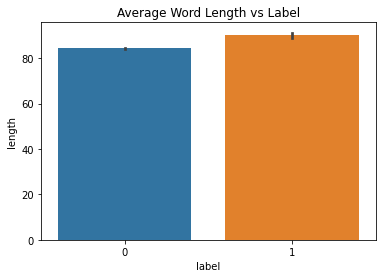

In [9]:
# Visualizing the average length of Tweets with Positive Sentiment (label "0") compare to that of Tweets with Negative Sentiment (label "1").
# From the sns plot below, the average word length of tweets in each category is almost the same.
sns.barplot('label','length',data = train_tweets)
plt.title('Average Word Length vs Label')

### **b) Data Label Distribution**
A balanced dataset is the one that contains equal or almost equal number of samples from the positive and negative class.  The number of Tweets with Positive Sentiment (label "0") and the number of Tweets with Negative Sentiment (label "1") are to be examined below.

From the graph below, there is a major imbalance in the data. There are a lot more tweets labelled "0" and a very few ones labelled "1". 

**Imbalanced Data**

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. Class imbalance can be found in many different areas including medical diagnosis, spam filtering, and fraud detection. More references are in [this article](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/).

Text(0.5, 1.0, 'Label Counts')

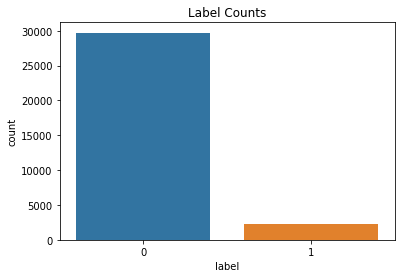

In [10]:
# Plotting the number of Tweets with Positive Sentiment (label "0") and the number of Tweets with Negative Sentiment (label "1") in the dataset.
sns.countplot(x= 'label',data = train_tweets)
plt.title('Label Counts')

## **3. Text Processing**

The main issue with this data is that it is all in text format (strings). The classification algorithms need some sort of numerical feature vector to perform the classification task. In this lesson, tried out the following techniques of preprocessing the raw data:
1. Removal of punctuations.
2. Removal of commonly used words (stopwords).
3. Normalization of words.



In [11]:
# import the`nltk library for text processing
import nltk

#### **i) Removal Of Punctuations**




In [12]:
# import `TextBlob` library to remove all the punctuations from the Tweet
nltk.download('punkt')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
# Generating the list of words in the tweet (with hastags and other punctuations removed)
def form_sentence(tweet):
  # TextBlob(tweet) creates an instance of tweet which can be processed by the Library.
  tweet_blob = TextBlob(tweet)
  # returns a string by joining all the elements of the list, separated by a string separator, which is a space (`" "`) in this case.
  return ' '.join(tweet_blob.words)

In [14]:
# example
form_sentence("#this is an good and clear example!!! XDD :)")

'this is an good and clear example XDD'

#### **ii) Removal Of Stopwords And Words With Unusual Symbols** 

Stopwords are very common words in english, for example 'the', 'a', etc. 
- Import a list of stopwords from the NLTK library to remove them. 
- Stopwords do not make sense in learning because they don’t have connections with sentiments. 
- **Removing them saves the computational power** as well as **increases the accuracy of the model**.


In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
# Removing stopwords and words with unusual symbols
def no_user_alpha(tweet):
    # removes the keyword "user" from the tweet
    tweet_list = [ele for ele in tweet.split() if ele != 'user']

    # removes any non-word character(s) (e.g "#", "@") or number(s) at the start of a word with the use of regular expression. For example "@Hello, "#Hello", and "123Hello" becomes "Hello".
    # [Regular Expression](https://www.w3schools.com/python/python_regex.asp)
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)

    # removes all the stopwords provided by the NTLK Library
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [17]:
# example
no_user_alpha("#this is a good and clear example!!! :)")

['good', 'clear']

#### **iii) Function For Text Processing (Combining Step i and ii)**



In [18]:
# Define a single function that will do all 2 steps of text processing:
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    return no_punc_tweet

In [19]:
# apply the text processing function to our train and test dataframes
# apply() method to apply a function to entire column in the dataframe
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_processing)
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_processing)

In [20]:
# comparing the original list and the list with only important words in the same dataframe
train_tweets

,label,tweet,length,tweet_list
0,0,@user when a father is dysfunctional and is s...,102,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,@user @user thanks for #lyft credit i can't us...,122,"[thanks, lyft, credit, ca, use, cause, offer, ..."
2,0,bihday your majesty,21,"[bihday, majesty]"
3,0,#model i love u take with u all the time in ...,86,"[model, love, u, take, u, time]"
4,0,factsguide: society now #motivation,39,"[factsguide, society, motivation]"
...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,"[ate, isz, youuu]"
31958,0,to see nina turner on the airwaves trying to...,131,"[see, nina, turner, airwaves, trying, wrap, ma..."
31959,0,listening to sad songs on a monday morning otw...,63,"[listening, sad, songs, monday, morning, otw, ..."
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,"[sikh, temple, vandalised, calgary, wso, conde..."


### **4. Model Building & Training**


In [21]:
from sklearn.model_selection import train_test_split

# The test dataset 'msg_tset and label_test' here is not from `test_tweets` dataframe
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)


## **4.1 SciKit Learn Pipline (and Naive Bayes Classification) method**

#### **Creating and Training the Model**

Pipeline concatenates the output of transformers into a composite feature space. SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) is capabled to create a pipeline of workflow. This will allow to set up all the transformations to be done to the data for future use. 

Library: **sklearn.pipeline.Pipeline**

*   Pipeline of transforms with a final estimator.
*   The purpose of the pipeline is to assemble several steps that can be **cross-validated** together while setting different parameters. 

---

Sequentially transform and classify the data in the following order:
1. **Bag of Words (BOW) Transformation:** A reduced and simplified representation of a text document from selected parts of the text, based on specific criteria, such as word frequency.
  * Library: *sklearn.feature_extraction.text.CountVectorizer**
    *   Converts a collection of text documents to a matrix of token counts

2. **TF-IDF Transformation:** A formula that aims to define the importance of a keyword or phrase within a document or a web page.
  * Library: **sklearn.feature_extraction.text.TfidfTransformer**
    *   Transforms a count matrix to a normalized tf or tf-idf representation

3. **Naive Bayes Classification:** A classification algorithm that uses Bayes' theorem to classify objects. 
  * Library: **sklearn.naive_bayes.MultinomialNB**
    *   Naive Bayes classifier for multinomial models
    *   The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.





In [22]:
# Import required libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [23]:
# Instantiation
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [24]:
# Need an embedding layer to create the first hidden layer
msg_train.shape, msg_test.shape, label_train.shape, label_test.shape

((25569,), (6393,), (25569,), (6393,))

**iii) Model Fitting**

Now we use `.fit` to train the model using the train dataset.

In [25]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7f865370f3b0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### **5. Model Prediction & Evaluation**

#### **Prediction**

In [26]:
# The predictions is a list of labels (either 0 or 1) for Tweets in test dataset, msg_test
predictions = pipeline.predict(msg_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

Let's see how our predictions looks like. The `predictions` is a list of labels (either 0 or 1) for Tweets in test dataset, `msg_test`.

In [27]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

#### **Evaluation**


In [28]:
# import libraries to evaluate our model to see how good it is in predicting the type of Tweet by comparing the predicted labels with the actual labels in the test dataset.
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score

In [29]:
# print the Classification Report
# use different statistical evaluation methods to evaluate our model. Read more about these methods here
# [here](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6327
           1       0.15      1.00      0.26        66

    accuracy                           0.94      6393
   macro avg       0.57      0.97      0.62      6393
weighted avg       0.99      0.94      0.96      6393



## **Result of 4.1**

#### **Accuracy Score**
Accuracy score is the percentage of correctly predicted labels. Note that there are still chances to improve this accuracy by tuning parameters using GridSearchCV and other preprocessing techniques.

In [133]:
# Print the accuracy score
# Accuracy score is the percentage of correctly predicted labels. Note that there are chances to improve this accuracy by tuning parameters using GridSearchCV and other preprocessing techniques.
print(accuracy_score(predictions,label_test))

0.9414985139996872


#### **Confusion Matrix**
The following confusion matrix can be read as:
* Tweets with Positive Sentiment predicted correctly: 5953
* Tweets with Positive Sentiment predicted incorrectly: 374
* Tweets with Negative Sentiment predicted incorrectly: 0
* Tweets with Negative Sentiment predicted correctly: 66

In [134]:
print(confusion_matrix(predictions,label_test))

[[5953  374]
 [   0   66]]


## **4.2 LSTM Method**

In [32]:
msg_test

15616    can #lighttherapy help with #sad or #depressio...
2011       boy does 'happy dance' after hearing mom's v...
8887     1 ððâ¤ï¸ one fucking day !!!! tomorrow...
10522    i finally found a way how to delete old tweets...
4619      @user tomorrow will be my last day with @user...
                               ...                        
10396             @user our hands are up! #edfringe2016   
976      @user @user @user  man i even have a bunch of ...
1476      @user   to be a pa of this lineup at the @use...
13062    life is a pay money is the hangover. #pay #lif...
31091    happy living ppt powerpoint slides -   #ppt   ...
Name: tweet, Length: 6393, dtype: object

### **Word Embeddings**

A word embedding is an approach to provide a ***dense vector representation*** of words that capture something about their meaning.

Word embeddings are an ***improvement over simpler bag-of-word*** model word encoding schemes, like word counts and frequencies that result in large and sparse vectors (mostly 0 values) that describe documents but not the meaning of the words.

The vector space representation of the words provides a projection where **words with similar meanings are locally clustered within the space**.


The raw text after text processing needs to be further ***vectorized*** before using in a LSTM model. 

Here the library ***Gensim*** is used. It is an open-source library for ***unsupvised topic modeling and natural language processing***, using modern statistical machine learning. Gensim can be implemented in Python and Cython for performance.

> - Gensim is not an everything-including-the-kitchen-sink NLP reseach library like NLTK, but a mature, focused, and efficient suite of NLP tools for topic modeling
> - Gensim's Word2Vec is parallelized to take the advantage of machines with multi-core CPUs

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count()
cores

In [67]:
# Word2vec
import gensim

# WORD2VEC 

W2V_SIZE = 200 # The dimension no. of the embedding, e.g. the length of the dense vector to represent each token, default = 100
W2V_WINDOW = 5 # The max distance between a target word and words around the target words, default = 5
W2V_EPOCH = 32 
W2V_MIN_COUNT = 5 # The min count of words to be consider when training the models;
           # words which occur < than this count will be ignored, default = 5

w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                      window=W2V_WINDOW, 
                      min_count=W2V_MIN_COUNT, 
                      workers= cores) # The number of threads to use during training

print(w2v_model)

# Build the vocabulary from a sequence of sentence nad initialize the model
# Digest all the words and fi;ter out the unique words, and do some basic counts on them
documents = [_text.split() for _text in msg_train]
w2v_model.build_vocab(documents)

In [68]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

# Training of the model
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

Vocab size 6147


(6664596, 10761696)

In [132]:
w2v_model.wv.most_similar(positive="good")

[('nice', 0.5691197514533997),
 ('great', 0.5367411971092224),
 ('sunday', 0.4989299178123474),
 ('hoping', 0.46488773822784424),
 ('wonderful', 0.4526744782924652),
 ('productive', 0.4371235966682434),
 ('bad', 0.4234667420387268),
 ('late', 0.4022789001464844),
 ('perfect', 0.39761823415756226),
 ('cheat', 0.386159211397171)]

### **Keras Tokenizer class**
- Remove punctuation and split strings into lists of individual words (like what nltk does as in the above example)
- Convert the individual words into integers

By default, this **removes all punctuation, lowercases words**, and then **converts words to sequences of integers**. A Tokenizer is first fit on a list of strings and then converts this list into a list of lists of integers.

In [70]:
from keras.preprocessing.text import Tokenizer
### Create a Tokenizer object
tokenizer = Tokenizer(
    ### max number of words to keep
    # num_words = None,    

    ### String of character to be removed, note that '!?",.' are kept here
    # filters = '#$%&()*+-<=>@[\\]^_`{|}~\t\n',   

    ##3 Whether to convert the texts to lowercase
    lower = False, 
    
    ### Separator for word splitting.
    # split = ' '
    )

### Train the tokenizer to the texts
tokenizer.fit_on_texts(msg_train)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

### Convert lists of srtrings into list of lists of integer
from keras.preprocessing.sequence import pad_sequences
SEQUENCE_LENGTH = 200
x_train = pad_sequences(tokenizer.texts_to_sequences(msg_train), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(msg_test), maxlen=SEQUENCE_LENGTH)

Total words 39674


In [71]:
# Display the shapes of the traingin and testing datasets
print("msg_train", x_train.shape)
y_train = label_train.ravel().reshape(-1,1)
print("label_train", y_train.shape)
print()
print("msg_test",x_test.shape)
y_test = label_test.ravel().reshape(-1,1)
print("label_test", y_test.shape)

msg_train (25569, 200)
label_train (25569, 1)

msg_test (6393, 200)
label_test (6393, 1)


In [72]:
x_train

array([[    0,     0,     0, ..., 14130,  9033,  6912],
       [    0,     0,     0, ...,     4,   167, 14133],
       [    0,     0,     0, ...,  6913,  1020,  6914],
       ...,
       [    0,     0,     0, ...,   245,    13, 11882],
       [    0,     0,     0, ...,  3265,  1349, 39673],
       [    0,     0,     0, ...,  9056,  5442,   126]], dtype=int32)

### **Embedding layer**

Keras offers an ***Embedding layer*** that can be used for neural networks on text data.

It requires that the input data be ***integer encoded***, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API also provided with Keras.

The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

It is a flexible layer that can be used in a variety of ways, such as:

 - It can be used alone to learn a word embedding that can be saved and used in another model later.
 - It can be used as part of a deep learning model where the embedding is learned along with the model itself.
 - It can be used to load a pre-trained word embedding model, a type of transfer learning

In [73]:
vocab_size, W2V_SIZE

(39674, 200)

Epoch 1/2
3197/3197 [==============================] - 871s 271ms/step - loss: 0.1814 - accuracy: 0.9387 - val_loss: 0.1556 - val_accuracy: 0.9459
Epoch 2/2
3197/3197 [==============================] - 860s 269ms/step - loss: 0.1475 - accuracy: 0.9464 - val_loss: 0.1560 - val_accuracy: 0.9476
The accuracy of LSTM model is 94.6%, with training time 29.0 minutes and 36 seconds.


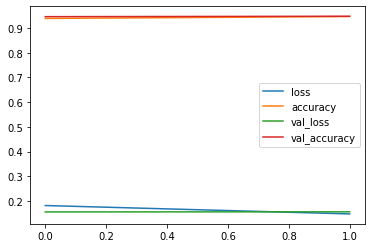

In [74]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from tensorflow.keras import callbacks
import time
import numpy as np
def LSTM_model(msg_train, msg_test, label_train, label_test):
  start_time = time.time()
  model = Sequential()

  # Embedding layer
  embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
  for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
      embedding_matrix[i] = w2v_model.wv[word]

  model.add(Embedding(input_dim=vocab_size,
                input_length = SEQUENCE_LENGTH,
                output_dim=W2V_SIZE,
                weights=[embedding_matrix],
                trainable=False,
                mask_zero=True))

  # Masking layer for pre-trained embeddings
  model.add(Masking(mask_value=0.0))

  # Recurrent layer
  model.add(LSTM(64, return_sequences=False, 
                dropout=0.1, recurrent_dropout=0.1))

  # Fully connected layer
  model.add(Dense(64, activation='relu'))

  # Dropout for regularization
  model.add(Dropout(0.5))

  # Output layer
  model.add(Dense(1, activation='sigmoid'))

  # Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  early_stopping = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=0, restore_best_weights=True)
  history_LSTM = model.fit(x_train, y_train, batch_size=8, validation_data=(x_test,y_test),epochs=2,verbose=1, callbacks=[early_stopping])
  loss, acc = model.evaluate(x_test, y_test, verbose=0)

  end_time = time.time()
  return acc, pd.DataFrame(history_LSTM.history), model, end_time - start_time
LSTM_acc, LSTM_plot, LSTM_model, LSTM_elapse_time = LSTM_model(x_train ,y_train, x_test, y_test)
LSTM_plot.plot()
print(f"The accuracy of LSTM model is {LSTM_acc*100:0.1f}%, with training time {np.floor(LSTM_elapse_time/60)} minutes and {LSTM_elapse_time%60:0.0f} seconds.")


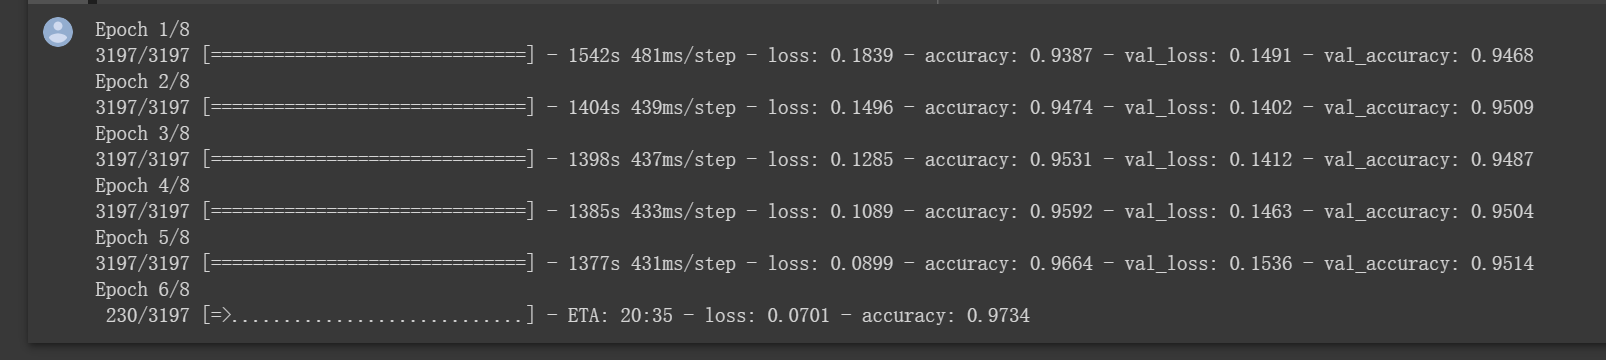

In [75]:
#@title  { display-mode: "form" }
from IPython import display
display.Image("/content/sample_data/Training with 8 epochs(EarlyStopping).png")

### **Model Prediction**

In [87]:
# predict the label of the train dataset
LSTM_predictions = LSTM_model.predict(x_test)
LSTM_predictions

array([[0.00892645],
       [0.15897772],
       [0.00124019],
       ...,
       [0.01918039],
       [0.00673199],
       [0.00110635]], dtype=float32)

In [110]:
LSTM_predictions[LSTM_predictions > 0.5].shape

(206,)

In [96]:
def predict(text):
  # Tokenize text
  x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)

  # Predict
  score = LSTM_model.predict([x_test])[0]

  # Decode sentiment
  if score < 0.5:
    label = "Positive"
  else:
    label = "Negative"
  return {"label": label, "score": float(score)}

In [97]:
predict("I love playing piano")

{'label': 'Positive', 'score': 0.03260517120361328}

In [112]:
predict("I hate raining")
# Prediction of negative sentiment may be more challenging due to the lack of negative training samples

{'label': 'Positive', 'score': 0.3846206068992615}

### **Model Evaluation**

We will now evaluate our model to see how good it is in predicting the type of Tweet by comparing the predicted labels with the actual labels in our test dataset.

In [84]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

#### **Classification Report**
We use different statistical evaluation methods to evaluate our model. You can read more about these methods [here](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9).

In [125]:
LSTM_classification = LSTM_predictions
for index,[i] in enumerate(LSTM_classification):
  if i < 0.5:
    LSTM_classification[index]=0
  else:
    LSTM_classification[index]=1
LSTM_classification

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [126]:
print(classification_report(LSTM_classification,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      6187
         1.0       0.34      0.73      0.46       206

    accuracy                           0.95      6393
   macro avg       0.67      0.84      0.72      6393
weighted avg       0.97      0.95      0.96      6393



## **Result of 4.2**

#### **Accuracy Score**
Accuracy score is the percentage of correctly predicted labels. Note that there are still chances to improve this accuracy by tuning parameters using GridSearchCV and other preprocessing techniques.


In [127]:
print(accuracy_score(LSTM_predictions,y_test))

0.9458783043954325


#### **Confusion Matrix**
The following confusion matrix can be read as:
* Tweets with Positive Sentiment predicted correctly: 5897
* Tweets with Positive Sentiment predicted incorrectly: 290
* Tweets with Negative Sentiment predicted incorrectly: 56
* Tweets with Negative Sentiment predicted correctly: 150

In [128]:
print(confusion_matrix(LSTM_predictions,y_test))

[[5897  290]
 [  56  150]]
